# Data Science Exercises: Breast Cancer Classification
In this notebook, you will work through six exercises focusing on data loading, model creation, and evaluation. You will learn how to leverage different machine learning algorithms to classify breast cancer samples based on various medical measurements.

In [1]:
!pip install XGBClassifier

ERROR: Could not find a version that satisfies the requirement XGBClassifier (from versions: none)
ERROR: No matching distribution found for XGBClassifier


In [2]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

## Exercise 1: Read the Data
In this first exercise, you will import the breast cancer dataset from the `sklearn.datasets`. This dataset contains features of different breast cancer tumors, labelled as benign or malignant.

### Instructions:
- Import the necessary libraries.
- Load the dataset using the `load_breast_cancer()` function.
- Store the features in `X` and labels in `Y`.

In [3]:
data = load_breast_cancer()
X = data['data']
Y = data['target']
df = pd.DataFrame(X, columns=data['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Exercise 2: Make a Small EDA (Exploratory Data Analysis) of the Breast Cancer Dataset

In this exercise, you will perform a basic exploratory data analysis (EDA) on the breast cancer dataset. EDA is crucial for understanding the underlying patterns, distributions, and potential relationships in the data, which will help in selecting appropriate models and preprocessing steps.

### Steps:

1. **Check the Data Types and Missing Values:**
   - Start by inspecting the data types of each column. This will help you understand the type of each feature (e.g., numeric, categorical) and whether any conversion is needed.
   - Check for any missing values in the dataset. Missing values can be handled by either filling them with appropriate values (e.g., mean or median) or by removing the corresponding rows or columns.

2. **Summary Statistics:**
   - Use the `describe()` method to get a summary of the numeric columns. This will provide key statistics such as the mean, standard deviation, min, and max values, which are helpful for understanding the distribution of each feature.
   - Look for any anomalies, outliers, or features that may need special attention (e.g., highly skewed distributions).

3. **Visualizations:**
   - **Feature Distributions:** Create histograms or box plots to visualize the distribution of the features, such as tumor size, texture, or smoothness. This will help assess the spread of the data and detect outliers.
   - **Correlation Matrix:** Visualize the correlation matrix to examine relationships between the features, focusing on features that are highly correlated with the target variable (malignant or benign).
   - **Pairwise Scatter Plots:** Visualize the relationships between pairs of features using scatter plots, particularly to explore any separation between malignant and benign cases.

4. **Class Distribution:**
   - Investigate the distribution of the target variable (malignant vs benign). Use the `value_counts()` method to determine how balanced the classes are.
   - Visualize the class distribution using a bar plot or pie chart to understand if there is an imbalance that could affect model training.

5. **Target Variable Analysis:**
   - Investigate how the target variable (malignant or benign) relates to the features. Is there a clear distinction between the two classes based on the features, or do the features overlap?


In [4]:
#check the data types and missing values
data_types = df.dtypes
missing_values = df.isnull().sum()
print("Data Types:\n", data_types)
print("\nMissing Values:\n", missing_values)


Data Types:
 mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst s

In [5]:
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
        mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             

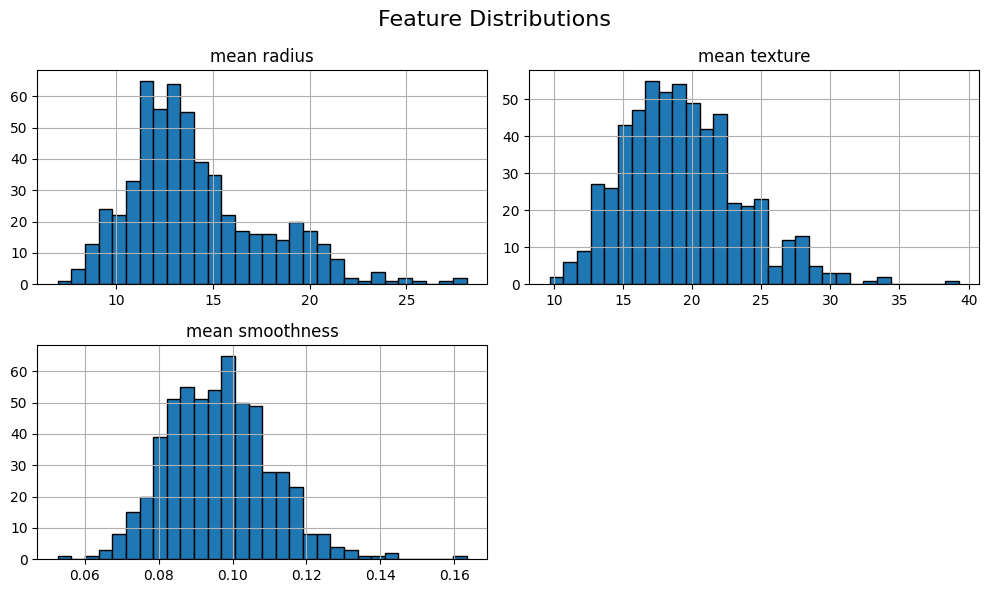

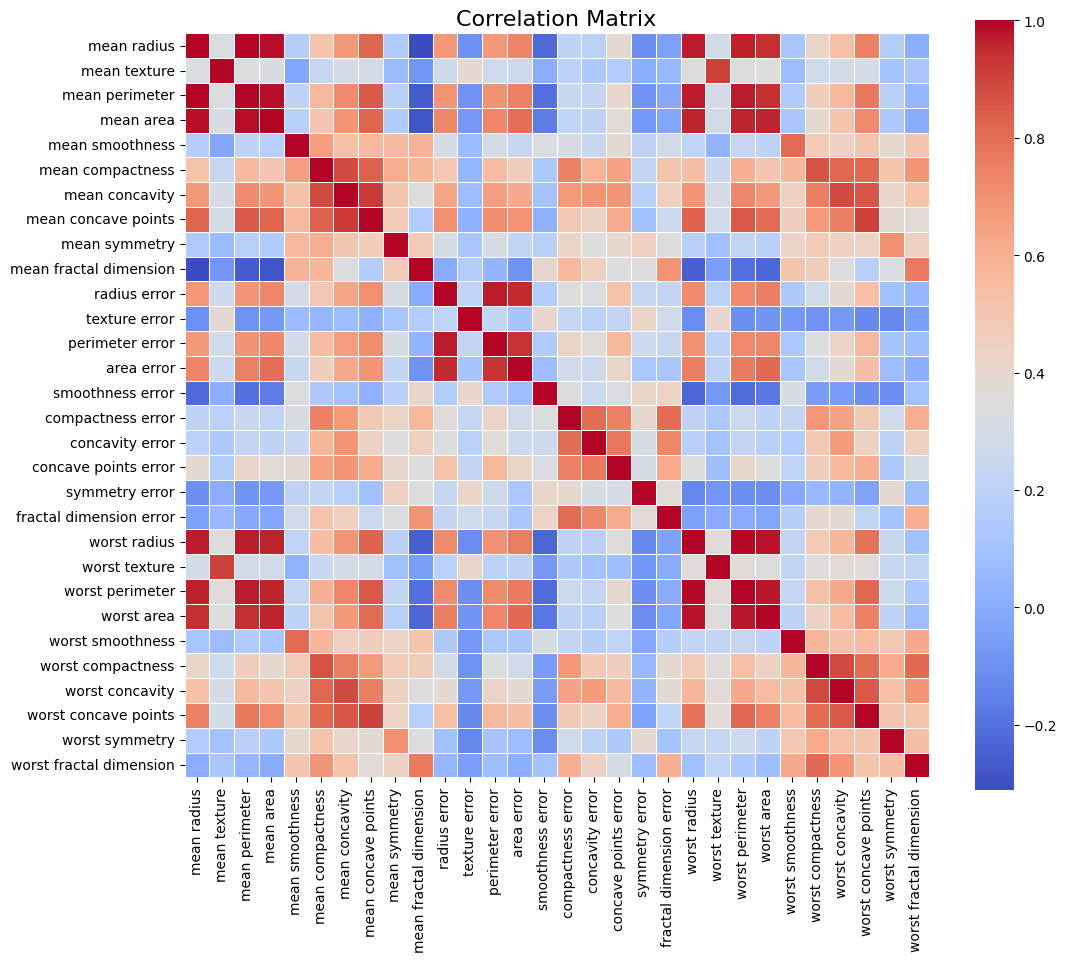

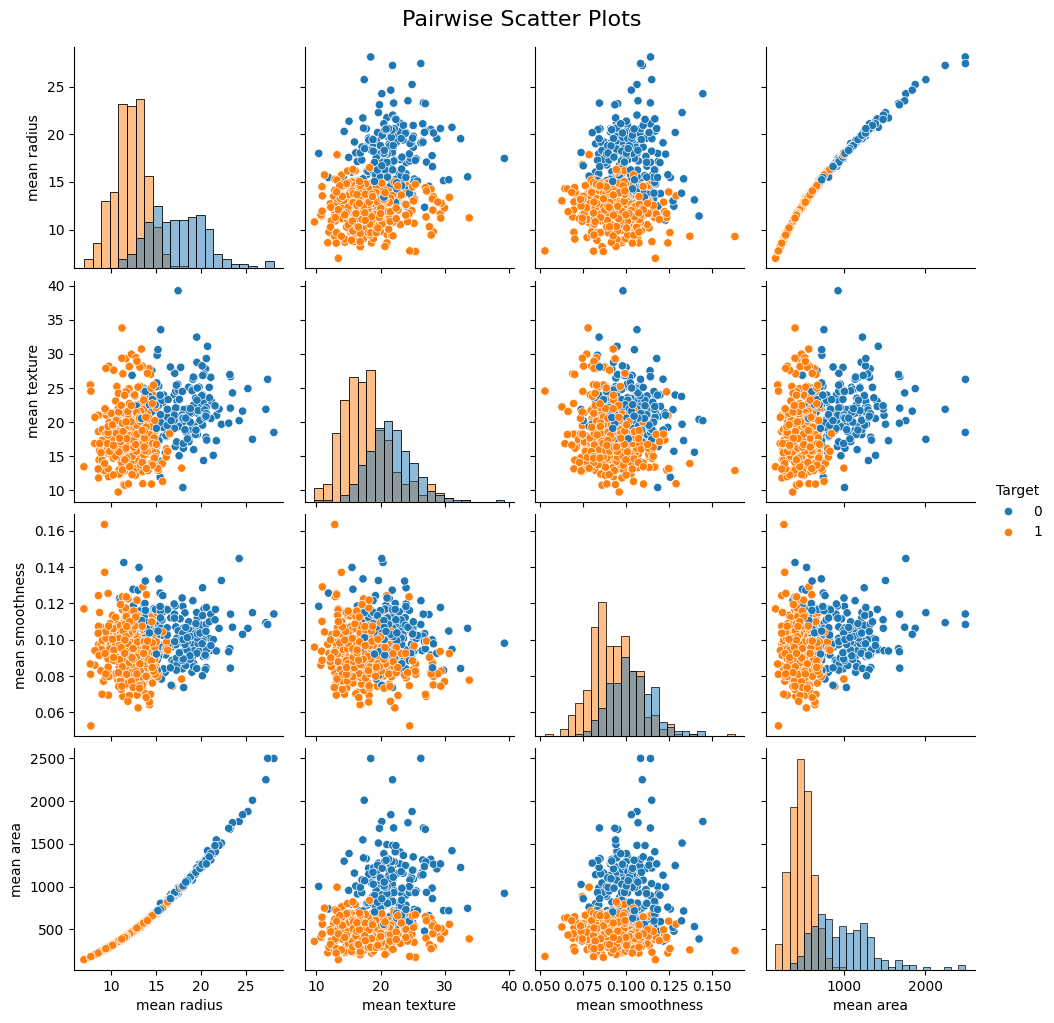

In [6]:
selected_features = ['mean radius', 'mean texture', 'mean smoothness']

df[selected_features].hist(bins=30, figsize=(10, 6), edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

scatter_features = ['mean radius', 'mean texture', 'mean smoothness', 'mean area']
scatter_df = df[scatter_features].copy()
scatter_df['Target'] = Y.astype(int)  # Ensuring the target variable is numeric
sns.pairplot(scatter_df, hue='Target', diag_kind='hist', height=2.5)
plt.suptitle('Pairwise Scatter Plots', fontsize=16, y=1.02)
plt.show()

<ipython-input-7-88829f4698ab>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")


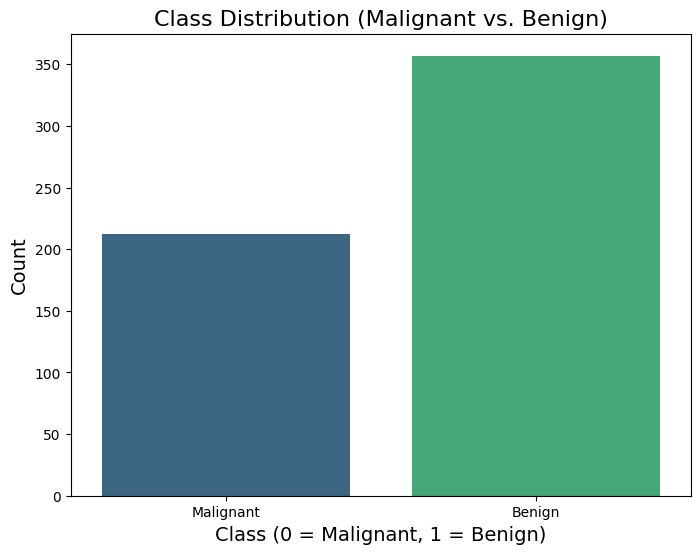

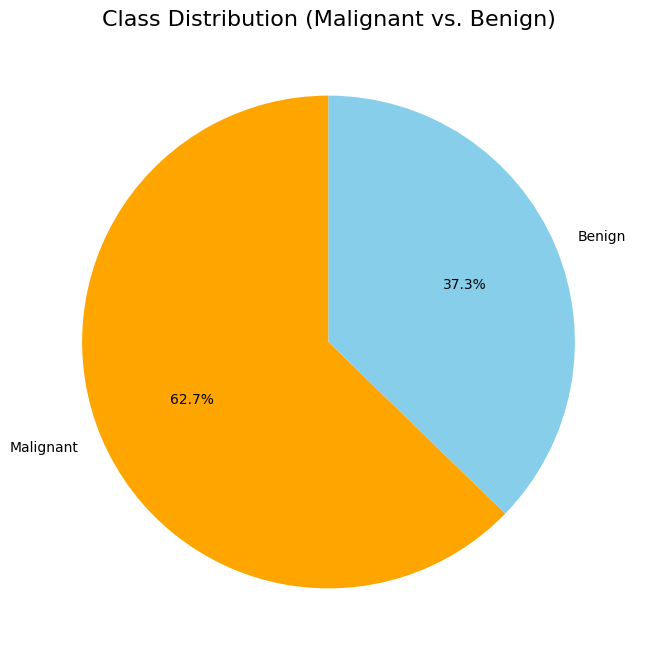

1    357
0    212
Name: count, dtype: int64


In [7]:
#class distribution
class_distribution = pd.Series(Y).value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
plt.title("Class Distribution (Malignant vs. Benign)", fontsize=16)
plt.xlabel("Class (0 = Malignant, 1 = Benign)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Malignant', 'Benign'])
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(class_distribution.values, labels=['Malignant', 'Benign'], autopct='%1.1f%%', startangle=90, colors=['orange', 'skyblue'])
plt.title("Class Distribution (Malignant vs. Benign)", fontsize=16)
plt.show()

# Displaying the class counts
print(class_distribution)


<ipython-input-8-273f0f8ea33e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=Y, y=df[feature], palette="viridis")
<ipython-input-8-273f0f8ea33e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=Y, y=df[feature], palette="viridis")
<ipython-input-8-273f0f8ea33e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=Y, y=df[feature], palette="viridis")


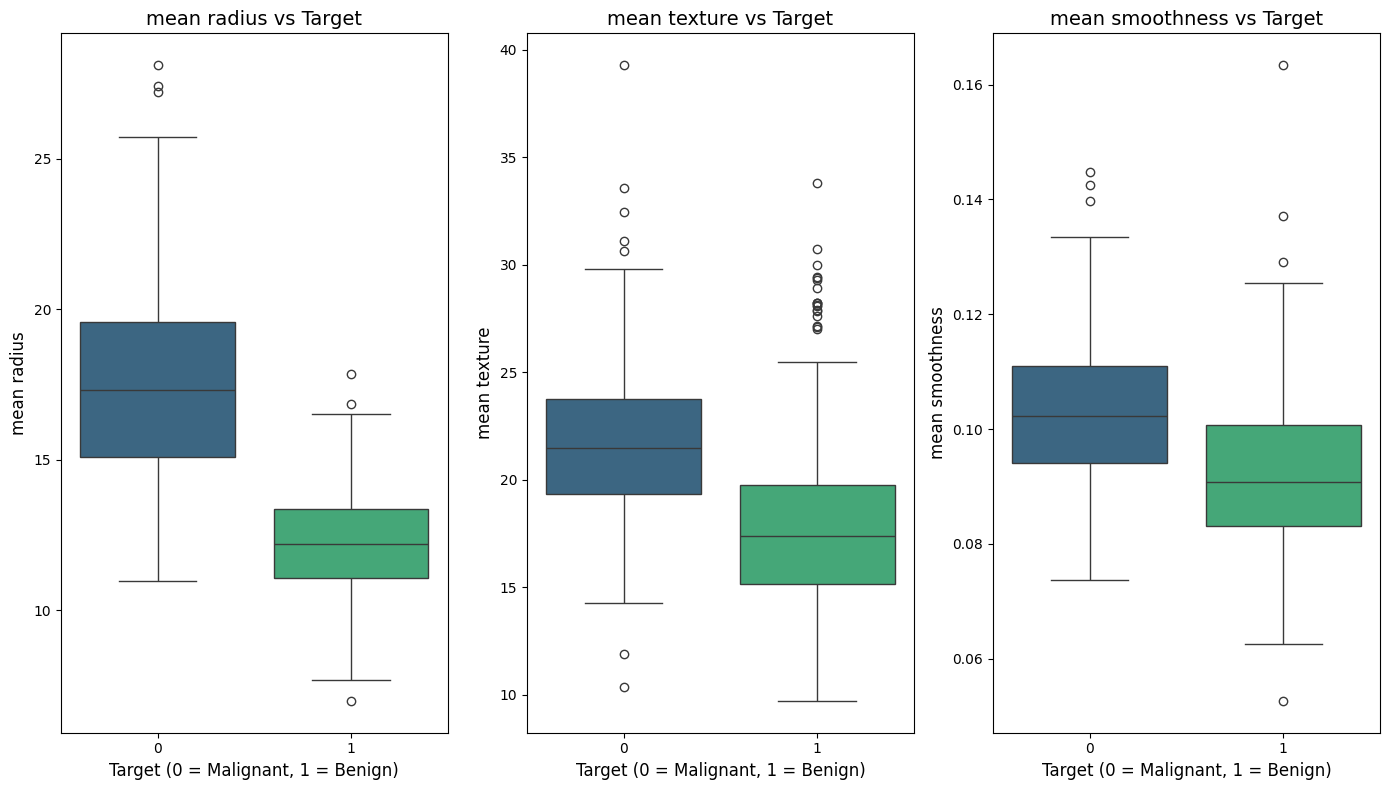

<ipython-input-8-273f0f8ea33e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=Y, y=df[feature], palette="muted")
<ipython-input-8-273f0f8ea33e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=Y, y=df[feature], palette="muted")
<ipython-input-8-273f0f8ea33e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=Y, y=df[feature], palette="muted")


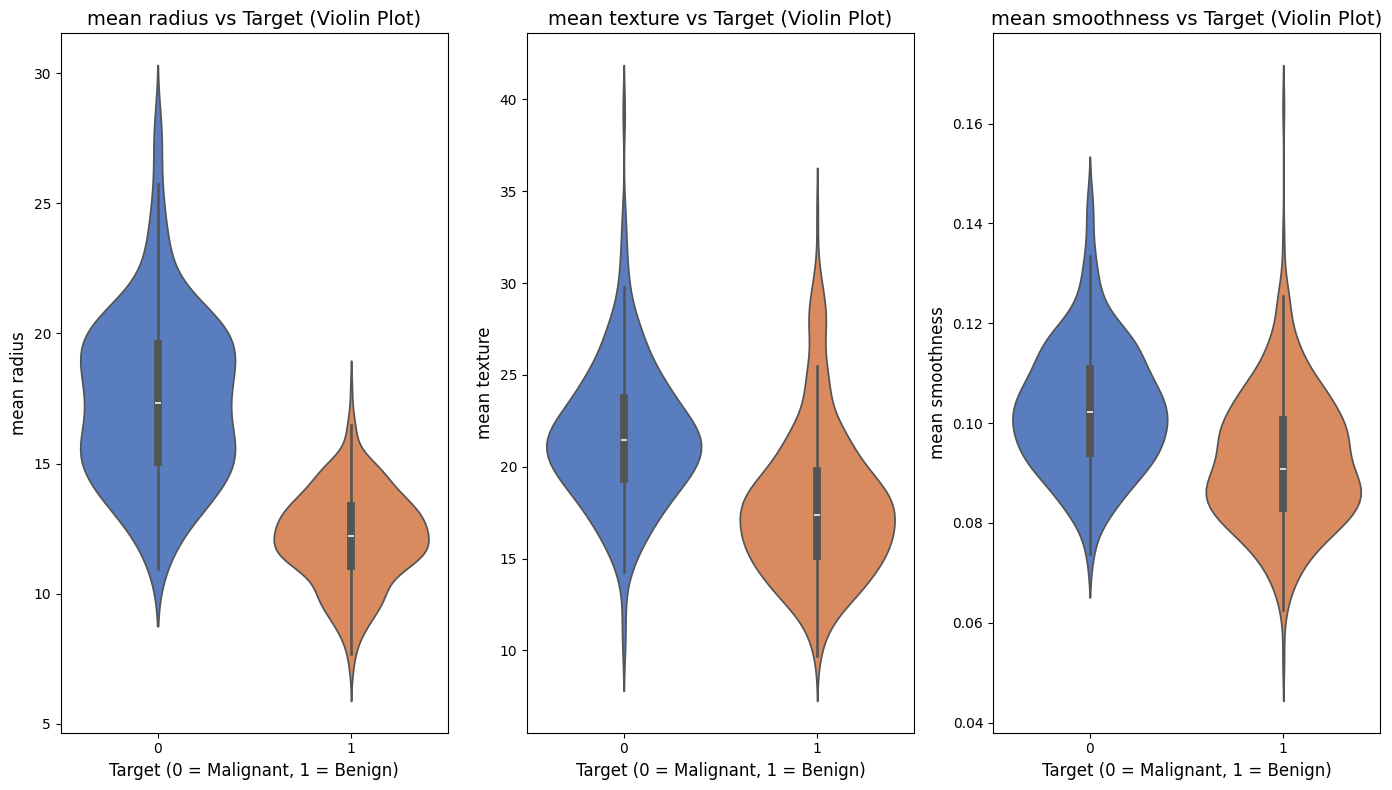

In [8]:
features_to_analyze = ['mean radius', 'mean texture', 'mean smoothness']

# Creating box plots to show the distribution of these features across the classes
plt.figure(figsize=(14, 8))
for i, feature in enumerate(features_to_analyze, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=Y, y=df[feature], palette="viridis")
    plt.title(f'{feature} vs Target', fontsize=14)
    plt.xlabel('Target (0 = Malignant, 1 = Benign)', fontsize=12)
    plt.ylabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

# Visualizing feature separation using violin plots
plt.figure(figsize=(14, 8))
for i, feature in enumerate(features_to_analyze, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(x=Y, y=df[feature], palette="muted")
    plt.title(f'{feature} vs Target (Violin Plot)', fontsize=14)
    plt.xlabel('Target (0 = Malignant, 1 = Benign)', fontsize=12)
    plt.ylabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

## Exercise 3: Baseline Model
Now that you are familiar with the data, it's time to create a baseline machine learning model. You will use logistic regression or a decision tree as a starting point to predict labels.

### Instructions:
- **Split the data:**
  - Split the dataset into training and testing sets using `train_test_split`.
  - `X_train, X_test` are the features for training and testing.
  - `Y_train, Y_test` are the labels for training and testing.
  - `test_size=0.3` means 30% of the data will be used for testing.

- **Train the model:**
  - Create a `DecisionTreeClassifier` model.
  - Fit the model to the training data (`X_train` and `Y_train`).

- **Predictions:**
  - Use the trained model to make predictions on the test set (`X_test`).
  - Store the predictions in `Y_pred`.

- **Evaluation:**
  - Calculate and print the accuracy of the model using `accuracy_score`, `precision_score`, `recall_score`.
  - Print the confusion matrix using `confusion_matrix` to assess the model's performance.
  - ROC AUC



In [9]:
# Your code here to create and evaluate a baseline model
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

# Creating and training a DecisionTreeClassifier model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)

# Making predictions on the test set
Y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])
conf_matrix = confusion_matrix(Y_test, Y_pred)



Accuracy for Baseline: 0.9181286549707602
Precision for Baseline: 0.9345794392523364
Recall for Baseline: 0.9345794392523364
ROC AUC for Baseline: 0.9126022196261683


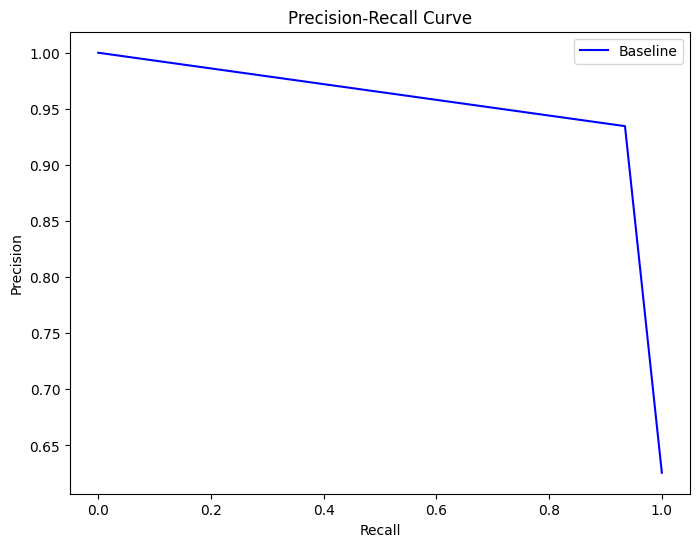

In [11]:
# evaluate the model to simplify try to fill it in the gaps
print("Accuracy for Baseline:",accuracy_score(Y_test, Y_pred)) # where Y_pred_baseline is the predictions you done on the model above
print("Precision for Baseline:",precision_score(Y_test, Y_pred))
print("Recall for Baseline:",recall_score(Y_test, Y_pred))
print("ROC AUC for Baseline:",roc_auc_score(Y_test, Y_pred))

# Plot Precision-Recall Curve

precision_baseline, recall_baseline, _ = precision_recall_curve(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall_baseline, precision_baseline, label='Baseline', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

## Exercise 4: Ensemble Models
In this exercise, you will implement ensemble methods to improve your model's performance. Consider using a voting classifier or stacking multiple models together.

### Instructions:
- Utilize multiple models like `RandomForestClassifier` and `LogisticRegression`.
- Use `VotingClassifier` or `StackingClassifier` and train on the same training data.
- Evaluate the ensemble model using accuracy and other metrics.

In [ ]:
# Your code here to create and evaluate ensemble models


logistic_regression_model=??
# use this to help you fill it in tho
ensemble_model = VotingClassifier(estimators=[('lr', logistic_regression_model),('rf',),voting=

ensemble_model.fit(???
# Predictions
Y_pred = ensemble_model.predict(????)
# Evaluation
print("Ensemble Accuracy:", accuracy_score(Y_test, Y_pred))

In [ ]:
# evaluate the model use previous code on exercise 4

## Exercise 5: Use XGBoost
For this exercise, you will implement an XGBoost model. XGBoost often provides better performance due to its boosting algorithm and handling of overfitting.

### Instructions:
- Import the `XGBClassifier` from `xgboost`.
- Train the model on the training data and evaluate its performance.




In [ ]:
# Your code here to create and evaluate an XGBoost model

# Create and train model
xgb_model = XGBClassifier()


## Exercise 6: Final Evaluation
In the final exercise, you should compare the performance of the different models you've trained, including the baseline, ensemble, and XGBoost models. Use various evaluation metrics such as precision, recall, and ROC AUC.

### Instructions:
- For each model, compute precision, recall, and other metrics.
- Use the `classification_report` and ROC AUC to summarize model performance.



In [ ]:
# Accuracy
print("Accuracy for Baseline:", accuracy_score(Y_test, Y_pred_baseline))
print("Accuracy for Ensemble:", accuracy_score(Y_test, Y_pred_ensemble))
print("Accuracy for XGBoost:", accuracy_score(Y_test, Y_pred_xgb))

# Precision
print("Precision for Baseline:", precision_score(Y_test, Y_pred_baseline))
print("Precision for Ensemble:", precision_score(Y_test, Y_pred_ensemble))
print("Precision for XGBoost:", precision_score(Y_test, Y_pred_xgb))

# Recall
print("Recall for Baseline:", recall_score(Y_test, Y_pred_baseline))
print("Recall for Ensemble:", recall_score(Y_test, Y_pred_ensemble))
print("Recall for XGBoost:", recall_score(Y_test, Y_pred_xgb))

# ROC AUC
print("ROC AUC for Baseline:", roc_auc_score(Y_test, Y_pred_baseline))
print("ROC AUC for Ensemble:", roc_auc_score(Y_test, Y_pred_ensemble))
print("ROC AUC for XGBoost:", roc_auc_score(Y_test, Y_pred_xgb))

# Precision-Recall Curve
precision_baseline, recall_baseline, _ = precision_recall_curve(Y_test, Y_pred_baseline)
precision_ensemble, recall_ensemble, _ = precision_recall_curve(Y_test, Y_pred_ensemble)
precision_xgb, recall_xgb, _ = precision_recall_curve(Y_test, Y_pred_xgb)

# Plot Precision-Recall Curve
import matplotlib.pyplot as plt
precision_baseline, recall_baseline, _ = precision_recall_curve(Y_test, Y_pred_baseline)
plt.figure(figsize=(8, 6))
plt.plot(recall_baseline, precision_baseline, label='Baseline', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()